In [2]:
import sympy as sp
import control 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[9])

Pre Report 1

In this section, the function requested in Question 1 of the pre-report is simulated.
The numerator and denominator coefficients are stored in two arrays, and the function is created using the control library functions.
A sampling time of 0.1 seconds is assumed.

In [3]:
# Define the numerator and denominator coefficients
numerator = [-1, 1.9, 0.95]
denominator = [1, -0.18, 0.08, -0.08]

# Create the transfer function
H = control.TransferFunction(numerator, denominator, dt=0.1)  # dt=1 for discrete time

# Print the transfer function
print(H)



     -z^2 + 1.9 z + 0.95
------------------------------
z^3 - 0.18 z^2 + 0.08 z - 0.08

dt = 0.1



REP 1

In this section, a white noise input is generated using the numpy library, applied to the main system, and the resulting output is displayed.

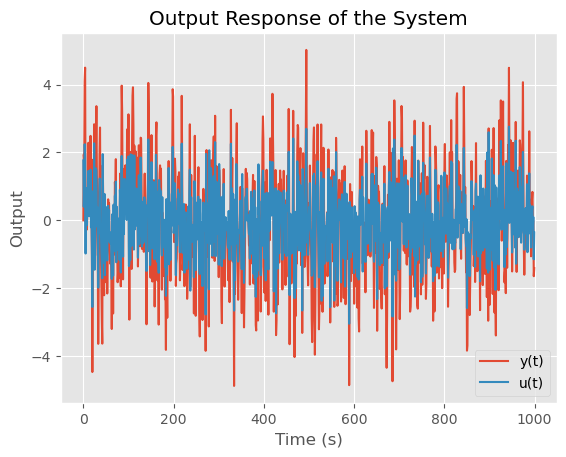

In [4]:
# Generate white noise as input
np.random.seed(0)  # For reproducibility
n_samples = 1000  # Number of samples
white_noise = np.random.normal(0, 1, n_samples)  # Mean=0, Std=1

# Simulate the system response to white noise input
t = np.arange(n_samples)  # Time vector
wnresult= control.forced_response(H, T=t, U=white_noise)

# Plot the input and output
# Plotting the results
plt.figure()
plt.plot(wnresult.t, wnresult.outputs,label='y(t)')
plt.plot(t,white_noise,label='u(t)')
plt.title('Output Response of the System')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.legend()

plt.show()

In this section, two delayed inputs are applied to the system, and the resulting output is displayed.

Shape of delayed inputs: (1000, 2)
Shape of delayed outputs: (1000, 2)
Shape of combined features: (1000, 4)


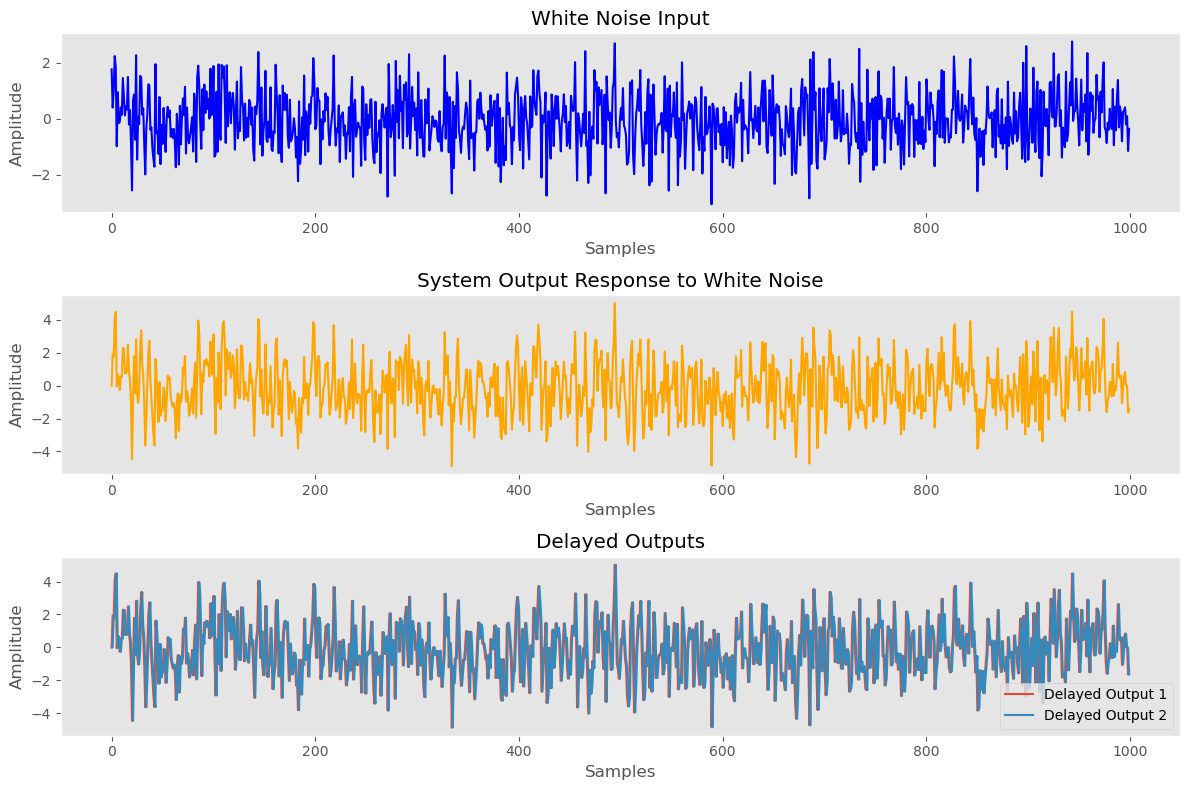

In [5]:
# Define the number of delays
input_delays = 2  # Number of input delays
output_delays = 2  # Number of output delays

# Create delayed input and output arrays
delayed_inputs = np.zeros((n_samples, input_delays))
delayed_outputs = np.zeros((n_samples, output_delays))

# Fill delayed input array
for i in range(input_delays):
    delayed_inputs[i:, i] = white_noise[:-i] if i > 0 else white_noise

# Fill delayed output array
for i in range(output_delays):
    delayed_outputs[i:, i] = wnresult.outputs[:-i] if i > 0 else wnresult.outputs

# Combine delayed inputs and outputs for training
features = np.hstack((delayed_inputs, delayed_outputs))

# Print the shapes for verification
print("Shape of delayed inputs:", delayed_inputs.shape)
print("Shape of delayed outputs:", delayed_outputs.shape)
print("Shape of combined features:", features.shape)

# Plot the original input and output along with delayed versions
plt.figure(figsize=(12, 8))

# Original Input
plt.subplot(3, 1, 1)
plt.plot(t, white_noise, label='White Noise Input', color='blue')
plt.title('White Noise Input')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()

# Original Output
plt.subplot(3, 1, 2)
plt.plot(t, wnresult.outputs, label='System Output', color='orange')
plt.title('System Output Response to White Noise')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()

# Delayed Outputs
plt.subplot(3, 1, 3)
for i in range(output_delays):
    plt.plot(t, delayed_outputs[:, i], label=f'Delayed Output {i+1}')
plt.title('Delayed Outputs')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


The white noise input along with its delays is stored in the array x.

In [6]:
# Create delayed input and output arrays
delayed_inputs = np.zeros((n_samples, input_delays))
delayed_outputs = np.zeros((n_samples, output_delays))
# Fill delayed input array
for i in range(input_delays):
    delayed_inputs[i:, i] = white_noise[:-i] if i > 0 else white_noise

# Fill delayed output array
for i in range(output_delays):
    delayed_outputs[i:, i] = wnresult.outputs[:-i] if i > 0 else wnresult.outputs

# Combine inputs and outputs for neural network input
# x = [input, inputDelayed1, inputDelayed2, outputDelayed2, outputDelayed1]
x = np.zeros((n_samples, input_delays + output_delays + 1))

# Fill in the input and delayed inputs/outputs
x[:, 0] = white_noise  # Original input
x[:, 1] = delayed_inputs[:, 0]  # inputDelayed1
x[:, 2] = delayed_inputs[:, 1]  # inputDelayed2
x[:, 3] = delayed_outputs[:, 1]  # outputDelayed2
x[:, 4] = delayed_outputs[:, 0]  # outputDelayed1

In this section, the neural network is constructed.
The torch library is used for this purpose.
Initially, based on performance evaluation, 100 epochs and 128 neurons were used, but due to high error (around 0.98), these were changed to 800 epochs and 256 neurons.
The network was trained using the white noise input along with its delays.

Epoch [20/800], Loss: 0.9629
Epoch [40/800], Loss: 0.8838
Epoch [60/800], Loss: 0.7892
Epoch [80/800], Loss: 0.6974
Epoch [100/800], Loss: 0.6170
Epoch [120/800], Loss: 0.5588
Epoch [140/800], Loss: 0.4992
Epoch [160/800], Loss: 0.4671
Epoch [180/800], Loss: 0.4305
Epoch [200/800], Loss: 0.3952
Epoch [220/800], Loss: 0.3875
Epoch [240/800], Loss: 0.3426
Epoch [260/800], Loss: 0.3246
Epoch [280/800], Loss: 0.3031
Epoch [300/800], Loss: 0.3020
Epoch [320/800], Loss: 0.3047
Epoch [340/800], Loss: 0.2892
Epoch [360/800], Loss: 0.3146
Epoch [380/800], Loss: 0.2351
Epoch [400/800], Loss: 0.2408
Epoch [420/800], Loss: 0.2477
Epoch [440/800], Loss: 0.2063
Epoch [460/800], Loss: 0.1973
Epoch [480/800], Loss: 0.2016
Epoch [500/800], Loss: 0.2023
Epoch [520/800], Loss: 0.1844
Epoch [540/800], Loss: 0.2463
Epoch [560/800], Loss: 0.1880
Epoch [580/800], Loss: 0.1919
Epoch [600/800], Loss: 0.1745
Epoch [620/800], Loss: 0.1897
Epoch [640/800], Loss: 0.1633
Epoch [660/800], Loss: 0.1514
Epoch [680/800

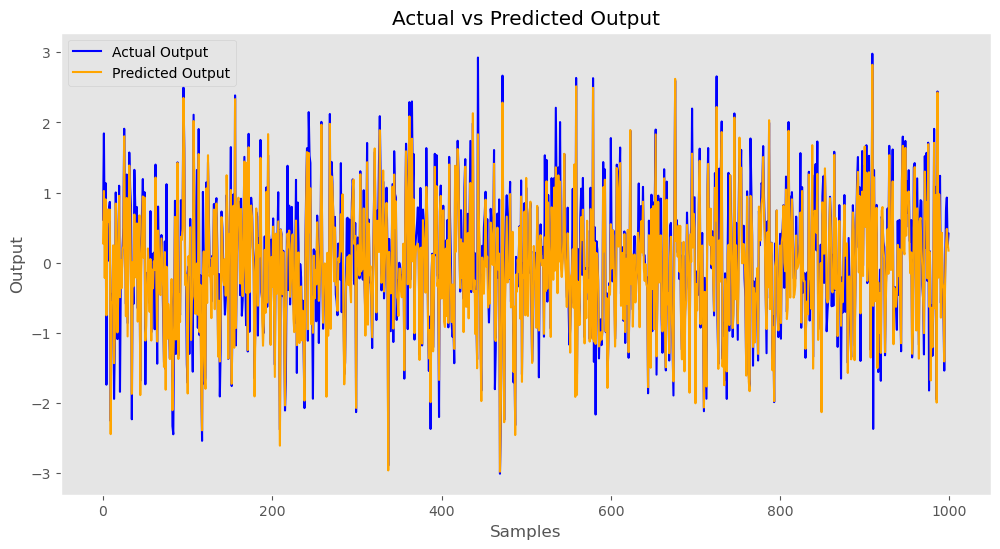

Model trained successfully with improved loss.


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Settings
n_samples = 1000
input_delays = 2
output_delays = 2
learning_rate = 0.001
num_epochs = 800  # Increased number of epochs

# Input data
x = np.zeros((n_samples, input_delays + output_delays + 1))
white_noise = np.random.normal(0, 1, n_samples)  # Main input
delayed_inputs = np.zeros((n_samples, input_delays))
delayed_outputs = np.random.normal(0, 1, (n_samples, output_delays))

# Filling delayed inputs and outputs
for i in range(input_delays):
    delayed_inputs[i:, i] = white_noise[:-i] if i > 0 else white_noise

x[:, 0] = white_noise  # Main input
x[:, 1] = delayed_inputs[:, 0]  # inputDelayed1
x[:, 2] = delayed_inputs[:, 1]  # inputDelayed2
x[:, 3] = delayed_outputs[:, 1] if output_delays > 1 else np.zeros(n_samples)  # outputDelayed2
x[:, 4] = delayed_outputs[:, 0]  # outputDelayed1

# Assume y is the actual output
y = np.random.normal(0, 1, n_samples)  # Replace with actual data

# Normalize inputs
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Convert to PyTorch tensors
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y).view(-1, 1)

# Define neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(x.shape[1], 256)  # Increased neurons
        self.fc2 = nn.Linear(256, 128)          # Increased neurons
        self.fc3 = nn.Linear(128, 64)           # Increased neurons
        self.fc4 = nn.Linear(64, 32)             # Increased neurons
        self.fc5 = nn.Linear(32, 1)              # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

# Create model
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:  # Print every 20 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(x_tensor)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Output', color='blue')
plt.plot(predictions.numpy(), label='Predicted Output', color='orange')
plt.title('Actual vs Predicted Output')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

print("Model trained successfully with improved loss.")


In this section, a sinusoidal input is applied to the estimated system.

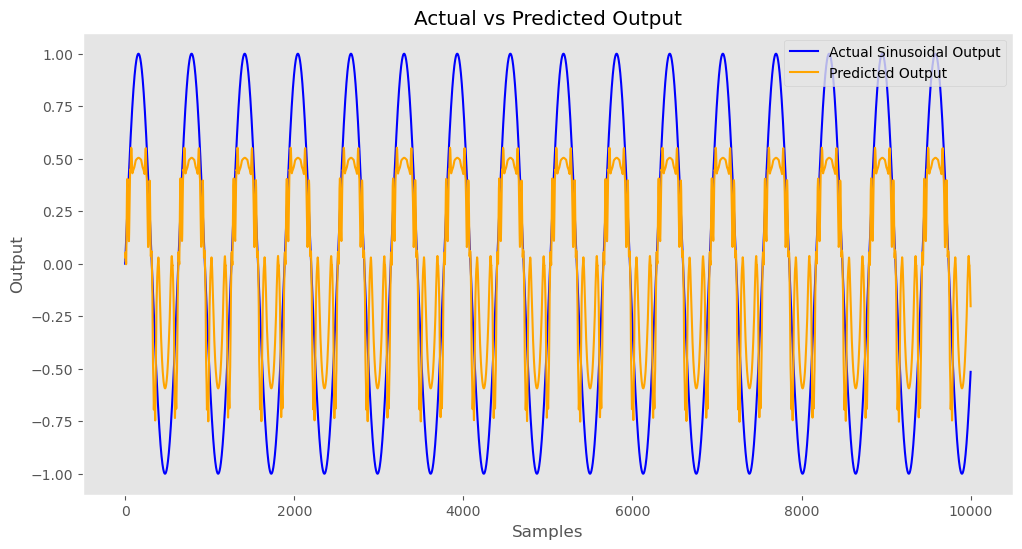

Model predictions made successfully.


In [10]:

# Settings
n_samples = 10000
input_delays = 2
output_delays = 2
frequency = 0.01  # Frequency of the sinusoidal input

# Generate sinusoidal input
t = np.arange(n_samples)
sinusoidal_input = np.sin(frequency * t)

# Prepare input data with delays
x = np.zeros((n_samples, input_delays + output_delays + 1))
delayed_inputs = np.zeros((n_samples, input_delays))
delayed_outputs = np.zeros((n_samples, output_delays))

# Fill delayed inputs
for i in range(input_delays):
    delayed_inputs[i:, i] = sinusoidal_input[:-i] if i > 0 else sinusoidal_input

x[:, 0] = sinusoidal_input  # Main input
x[:, 1] = delayed_inputs[:, 0]  # inputDelayed1
x[:, 2] = delayed_inputs[:, 1]  # inputDelayed2
x[:, 3] = delayed_outputs[:, 1] if output_delays > 1 else np.zeros(n_samples)  # outputDelayed2
x[:, 4] = delayed_outputs[:, 0]  # outputDelayed1



# Convert to PyTorch tensor
x_tensor = torch.FloatTensor(x)

# Load your trained model
# Assuming `model` is your trained model from previous code
# model = ... (load your model here)

# Make predictions
model.eval()
with torch.no_grad():
    predictions = model(x_tensor)

# Create the actual output for comparison (the same sinusoidal function)
actual_output = np.sin(frequency * t)  # Example output

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(actual_output, label='Actual Sinusoidal Output', color='blue')
plt.plot(predictions, label='Predicted Output', color='orange')
plt.title('Actual vs Predicted Output')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

print("Model predictions made successfully.")


# REP2


In this section, a filter is first designed for the system.

In [11]:
def integration_with_filter(y_prev, yd, yd_old, count, gain = 1, dt=.1):
    K = (.2)**(1/count**count)
    y_new = y_prev + K * (dt) * (yd + yd_old*gain)/(1+gain)
    return y_new

Here, a neural network is constructed to estimate the system.

In [58]:
import numpy as np

class TwolayerPerceptron:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.w1 = np.random.random((input_size, hidden_layer_size))
        self.w2 = np.random.random((hidden_layer_size, output_size))
        self.b1 = np.random.random((1, hidden_layer_size))
        self.b2 = np.random.random((1, output_size))

    def sigmoid(self, x):
        return 2 / (1 + np.exp(-x)) - 1

    def sigmoid_derivative(self, x):
        return (1 - self.sigmoid(x) ** 2) / 2

    def forward(self, x):
        z1 = x@self.w1 + self.b1
        a1 = self.sigmoid(z1)
        z2 = a1@self.w2 + self.b2
        # a2 = self.sigmoid(z2)
        return z2

    def gradient_calculation(self, x, state, A):

        # Forward pass
        z1 = x@self.w1 + self.b1
        a1 = self.sigmoid(z1)
        ghat = a1@self.w2 + self.b2
        t = 0
        dt = .1
        xhat = np.zeros(ghat.shape)
        for i in range(1, xhat.shape[0]):
            t += dt
            count = int(t/dt)
            xhat[i] = integration_with_filter(xhat[i-1], ghat[i]+state.T[i-1]@A, ghat[i-1]+state.T[i-2]@A, count, gain = 1, dt=.1)

        # a2 = self.sigmoid(z2)
        error2 = (state.T-xhat)@np.linalg.pinv(A) #xtilde
        self.history.append(np.mean(error2**2))
        # Backpropagation
        # error2 = z2 - y    #N * 1
        delta2 = error2 * 1#self.sigmoid_derivative(z2)
        # delta 2 is N*1 and a1 N*3
        grad_w2 = np.expand_dims(delta2,1) * np.expand_dims(a1, -1)   #N*1*1  N*3*1
        grad_w2 = np.sum(grad_w2,0)  # 3*1
        grad_b2 = np.sum(delta2, 0, keepdims=True)
        error1 = np.expand_dims(delta2,1) * np.expand_dims(self.w2,0)   #N*1  3*1
        error1 = np.sum(error1, -1)  #N*3
        delta1 = error1 * self.sigmoid_derivative(z1)
        # delta1 is N*3 and x is N*2  
        grad_w1 = np.expand_dims(delta1,1) * np.expand_dims(x,-1) # N*2*3
        grad_w1 = np.sum(grad_w1, 0)
        grad_b1 = np.sum(delta1, 0, keepdims=True)
                
        return grad_w1, grad_w2, grad_b1, grad_b2

    def train(self, x, state, A, update_step_num=1000, learning_rate=0.0001):
        self.history = []
        for i in range(update_step_num):
            grad_w1, grad_w2, grad_b1, grad_b2 = self.gradient_calculation(x, state, A)

            self.w1 -= learning_rate * grad_w1
            self.w2 -= learning_rate * grad_w2
            self.b1 -= learning_rate * grad_b1
            self.b2 -= learning_rate * grad_b2

A white noise input is provided to the system as training data.

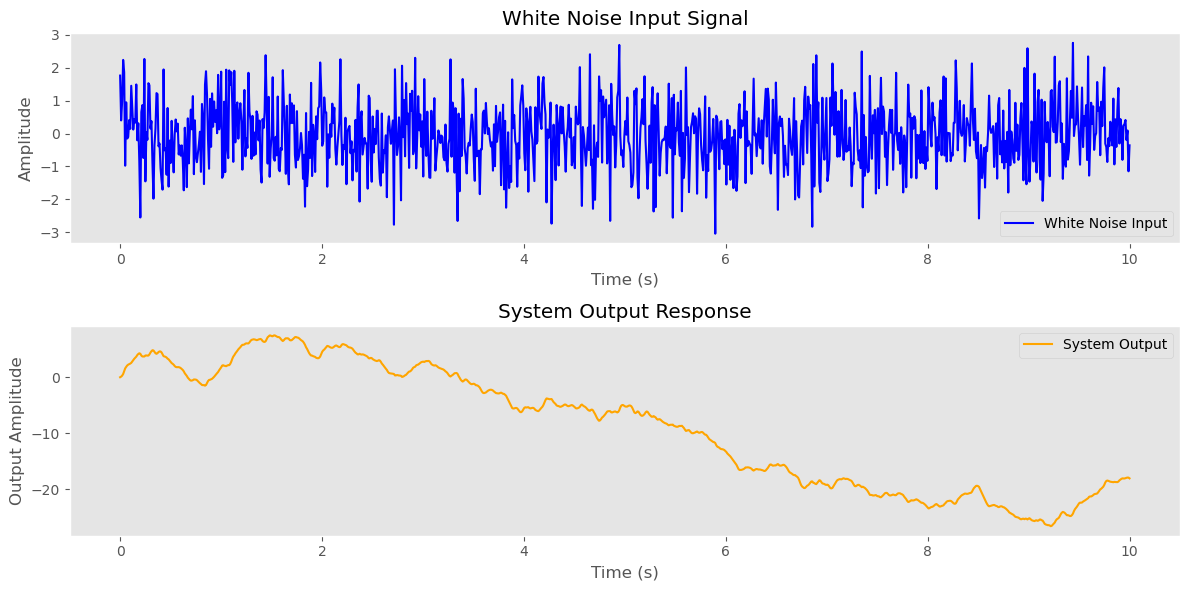

In [59]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Define the system matrices
A, B, C, D = np.array([[-50,0],[1,0]]), np.array([[1,0]]).T, np.array([0, 2000]), 0

# Define the transfer function
num = [40]
den = [0.02, 1, 0]
transfer_function = ctrl.TransferFunction(num, den)

# Time vector
t = np.linspace(0, 10, 1000)

# Generate white noise as the input signal
np.random.seed(0)  
white_noise = np.random.normal(0, 1, 1000)  # Mean = 0, Std = 1

# Simulate the system response to the white noise input
resp = ctrl.forced_response(transfer_function, t, white_noise)
t, output, state = resp.time, resp.outputs, resp.states

# Reshape if necessary
white_noise = white_noise.reshape([-1, 1])
output = output.reshape([-1, 1])

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('White Noise Input Signal')
plt.plot(t, white_noise, label='White Noise Input', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.title('System Output Response')
plt.plot(t, output, label='System Output', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Output Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

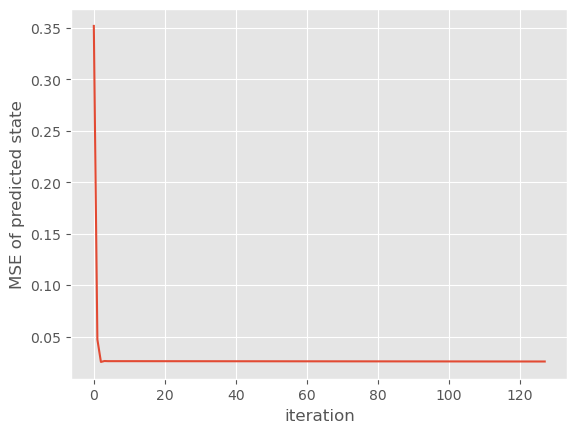

In [60]:
model3 = TwolayerPerceptron(white_noise.shape[1],1,2)
model3.train(white_noise, state, A, 128, 0.001)
plt.plot(model3.history)
plt.xlabel('iteration')
plt.ylabel('MSE of predicted state')
plt.grid('on')

In [61]:
input_signal = np.sin(t)
input_signal = input_signal.reshape([-1,1])
ghat = model3.forward(input_signal)

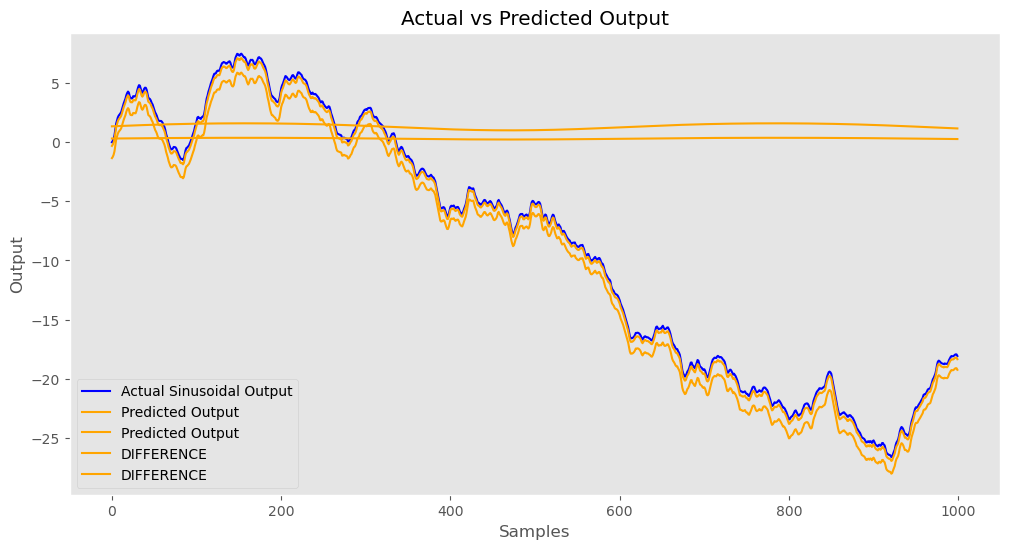

In [62]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(output, label='Actual Sinusoidal Output', color='blue')
plt.plot(ghat, label='Predicted Output', color='orange')
plt.plot(output-ghat, label='DIFFERENCE', color='orange')
plt.title('Actual vs Predicted Output')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

Due to poor performance, this time a cosine input is used for training.

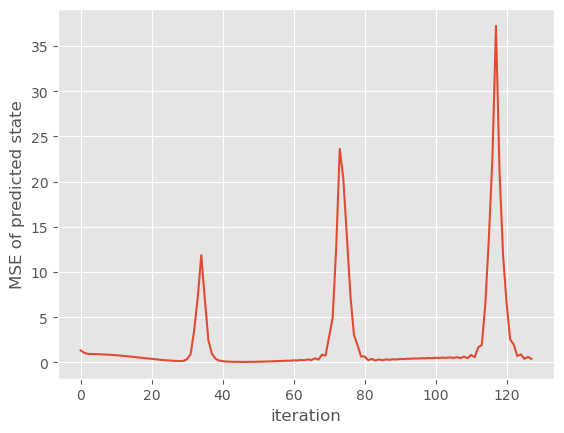

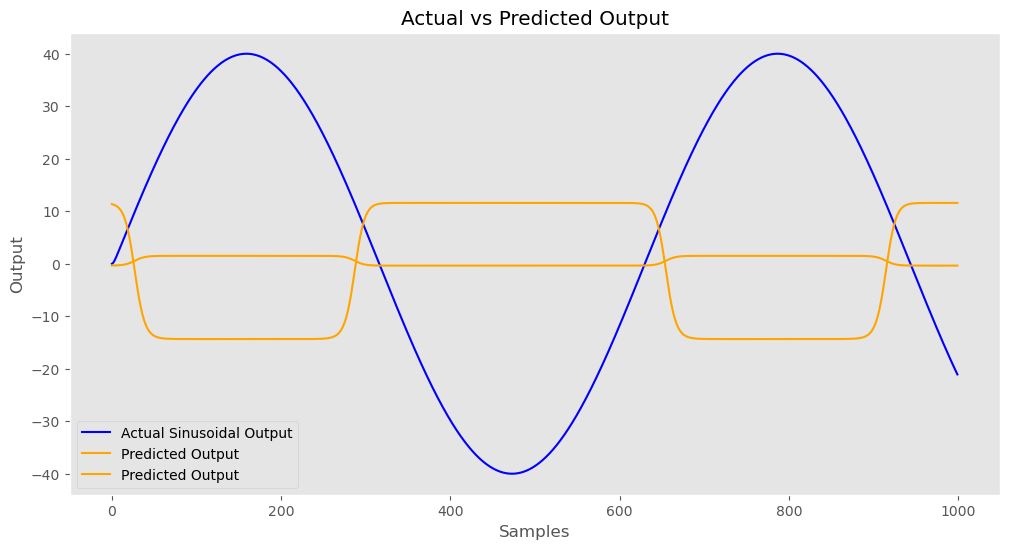

In [65]:
input_signal = np.cos(t)

resp = ctrl.forced_response(transfer_function, t, input_signal)
t, output, state = resp.time, resp.outputs, resp.states

input_signal = input_signal.reshape([-1,1])
output = output.reshape([-1,1])
model4 = TwolayerPerceptron(input_signal.shape[1],1,2)
model4.train(input_signal, state, A, 128, 0.0014)
plt.plot(model4.history)
plt.xlabel('iteration')
plt.ylabel('MSE of predicted state')
plt.grid('on')
input_signal = np.sin(t)
input_signal = input_signal.reshape([-1,1])
ghat = model4.forward(input_signal)
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(output, label='Actual Sinusoidal Output', color='blue')
plt.plot(ghat, label='Predicted Output', color='orange')
plt.title('Actual vs Predicted Output')
plt.xlabel('Samples')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()

# T1

In this section, several random inputs are applied to the system, and the outputs are calculated based on the system.
Then, the system is estimated using these random inputs.
Next, a sinusoidal input is considered and applied to the estimated system, and the results are evaluated.

Epoch [50/500], Loss: 0.0766
Epoch [100/500], Loss: 0.0303
Epoch [150/500], Loss: 0.0138
Epoch [200/500], Loss: 0.0031
Epoch [250/500], Loss: 0.0003
Epoch [300/500], Loss: 0.0000
Epoch [350/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [450/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000
Test Loss: 0.0000


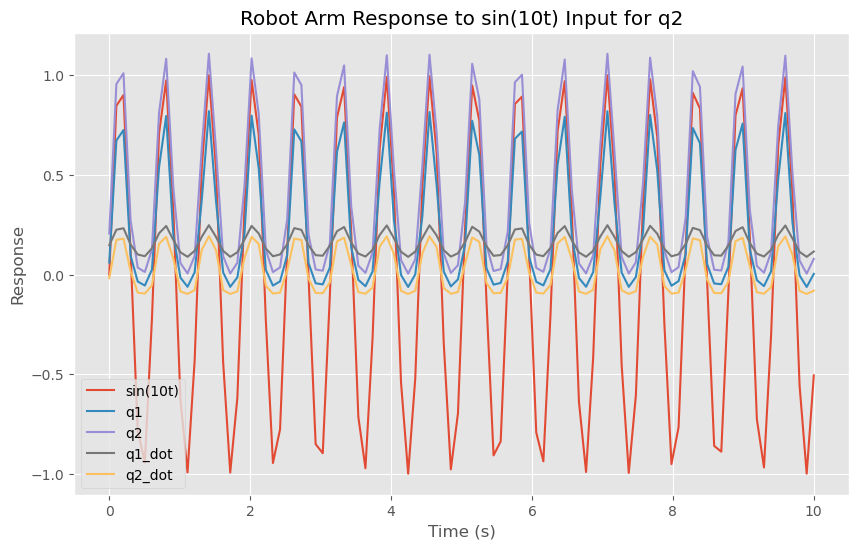

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# داده‌های نمونه (این داده‌ها باید از سیستم واقعی جمع‌آوری شوند)
# ورودی‌ها: گشتاورها u1 و u2
# خروجی‌ها: موقعیت‌ها و سرعت‌ها (q1, q2, q1_dot, q2_dot)
inputs = torch.tensor([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [4, 5, 6, 7]], dtype=torch.float32)
outputs = torch.tensor([[1, 2, 0.5, 0.5], [2, 3, 0.6, 0.6], [3, 4, 0.7, 0.7], [4, 5, 0.8, 0.8]], dtype=torch.float32)

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
train_inputs = inputs[:3]
train_outputs = outputs[:3]
test_inputs = inputs[3:]
test_outputs = outputs[3:]

# ساخت مدل شبکه عصبی
class RobotArmNN(nn.Module):
    def __init__(self):
        super(RobotArmNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # چهار ورودی داریم
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)  # چهار خروجی داریم

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RobotArmNN()

# تنظیمات آموزش
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# آموزش مدل
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs_pred = model(train_inputs)
    loss = criterion(outputs_pred, train_outputs)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# ارزیابی مدل با داده‌های آزمایشی
model.eval()
with torch.no_grad():
    test_pred = model(test_inputs)
    test_loss = criterion(test_pred, test_outputs)
    print(f'Test Loss: {test_loss.item():.4f}')

# اعمال ورودی سینوسی به مدل آموزش‌دیده
time_steps = np.linspace(0, 10, 100)
sin_input = np.sin(10 * time_steps)
sin_input = torch.tensor(sin_input, dtype=torch.float32).view(-1, 1)

# تکرار ورودی سینوسی برای سازگاری با ابعاد ورودی مدل (برای چهار ورودی)
sin_input_expanded = torch.cat((sin_input, sin_input, sin_input, sin_input), dim=1)

# پیش‌بینی با مدل آموزش‌دیده
sin_output = model(sin_input_expanded).detach().numpy()



# رسم نتایج
plt.figure(figsize=(10, 6))
plt.plot(time_steps,sin_input,label='sin(10t)')
plt.plot(time_steps, sin_output[:, 0], label='q1')
plt.plot(time_steps, sin_output[:, 1], label='q2')
plt.plot(time_steps, sin_output[:, 2], label='q1_dot')
plt.plot(time_steps, sin_output[:, 3], label='q2_dot')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Robot Arm Response to sin(10t) Input for q2')
plt.legend()
plt.show()
